No. of .wav files in audio folder =  1
<class 'numpy.ndarray'> <class 'int'>
(1323009,) 44100


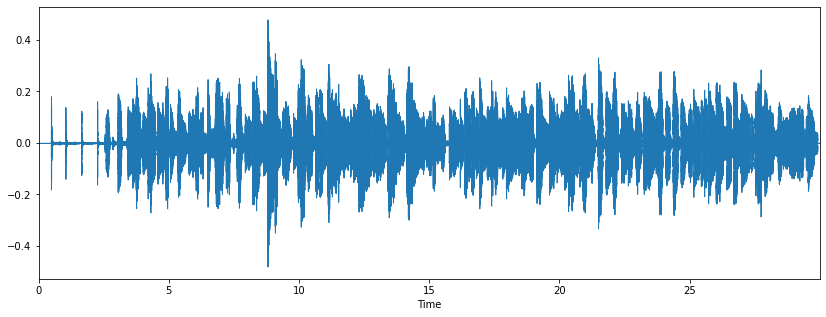

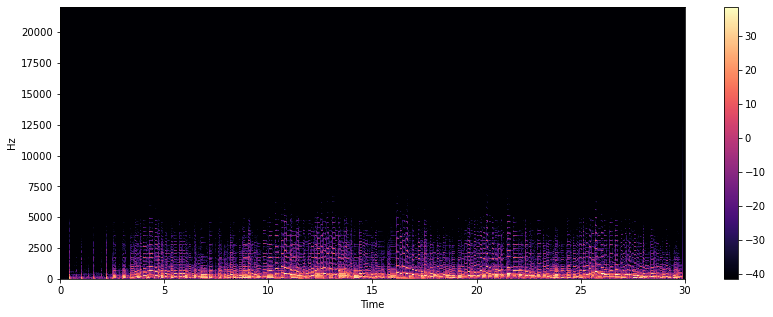

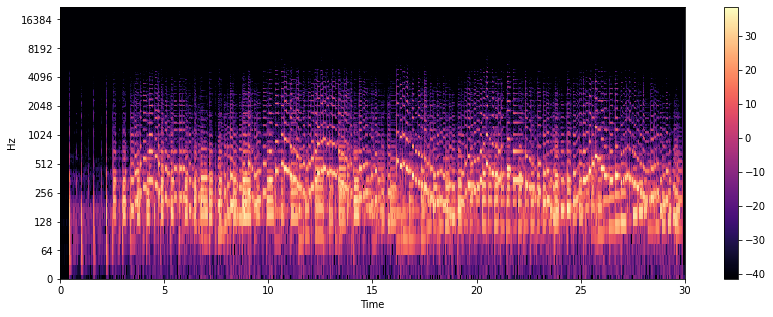

In [1]:
## Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install librosa

import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import sys
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

def visualize(path: str):


    audio_fpath = "./AudioFiles"
    audio_clips = os.listdir(audio_fpath)
    print("No. of .wav files in audio folder = ", len(audio_clips))


    #x, sr = librosa.load(path, sr=44100)

    x, sr = librosa.load(audio_fpath+'/'+audio_clips[0], sr=44100)

    print(type(x), type(sr))
    print(x.shape, sr)

    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)

    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))

    # before log transformation 

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.savefig('spec_time_hz.png')


    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

    plt.savefig('spec_time_log.png')

    plt.show()


if __name__ == "__main__":
    path = sys.argv[1]
    visualize(path)

No. of .wav files in audio folder =  1
<class 'numpy.ndarray'> <class 'int'>
(1323009,) 44100


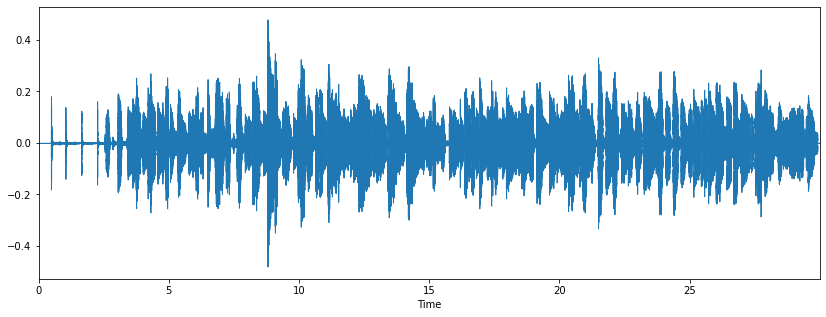

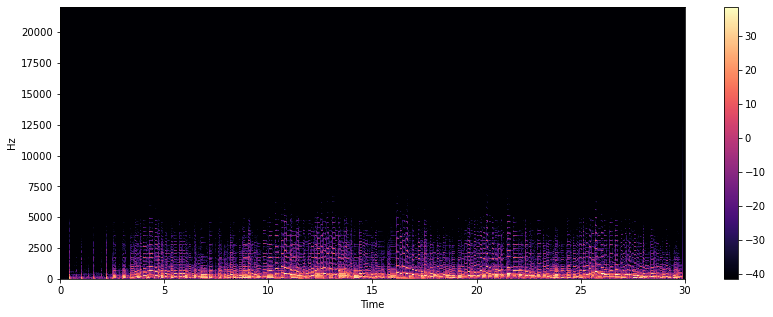

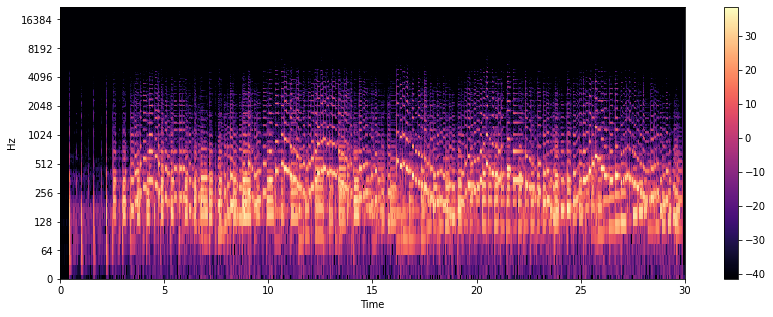

In [2]:
visualize("./AudioFiles")

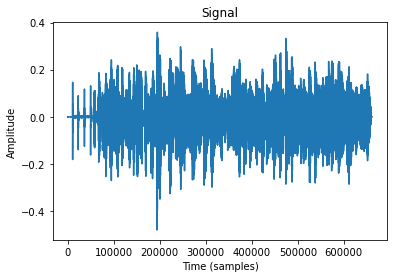

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
audio_fpath = "./AudioFiles"
audio_clips = os.listdir(audio_fpath)
y, sr = librosa.load(audio_fpath+'/'+audio_clips[0])
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

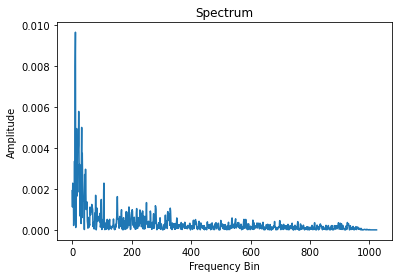

In [4]:

import numpy as np
n_fft = 4096
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');


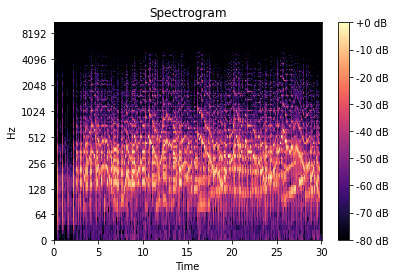

In [5]:

spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');


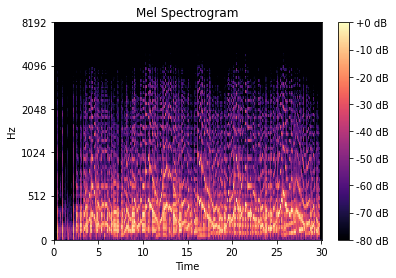

In [6]:

mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8192, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [7]:
>>> y = librosa.effects.harmonic(y)
>>> tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
>>> tonnetz

array([[-0.06526526, -0.04972237, -0.03490135, ...,  0.08256915,
         0.00509921, -0.05065474],
       [ 0.09170333,  0.06663618,  0.04182958, ...,  0.00292697,
         0.01084981,  0.03555303],
       [ 0.05816056,  0.0522573 ,  0.0542575 , ..., -0.21939695,
        -0.14901553, -0.08068548],
       [-0.12337637, -0.11159916, -0.11255831, ...,  0.02590268,
         0.02971106,  0.02122968],
       [ 0.06560636,  0.04771635,  0.02781104, ..., -0.00730654,
        -0.00585893,  0.00611278],
       [-0.05745095, -0.06099589, -0.06127756, ...,  0.06603046,
         0.02849231, -0.00098208]])

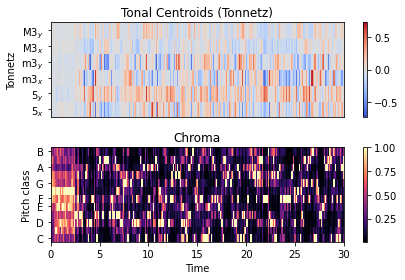

In [8]:
import matplotlib.pyplot as plt
>>> plt.subplot(2, 1, 1)
>>> librosa.display.specshow(tonnetz, y_axis='tonnetz')
>>> plt.colorbar()
>>> plt.title('Tonal Centroids (Tonnetz)')
>>> plt.subplot(2, 1, 2)
>>> librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),
...                          y_axis='chroma', x_axis='time')
>>> plt.colorbar()
>>> plt.title('Chroma')
>>> plt.tight_layout()

In [9]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

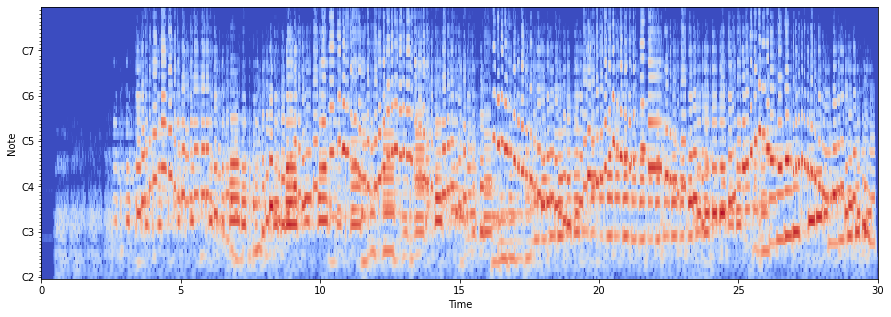

In [10]:
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')